<a href="https://colab.research.google.com/github/TamasFelfoldi/LaTeX-char-counter/blob/main/LaTeX_char_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. lépés

    Fájlok -> Feltöltés ikon -> töltsd föl a pdf-edet!

  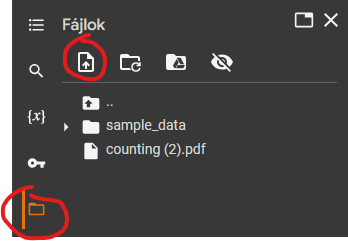
2. lépés

    A lenti mezőbe az idézőjelek jelek közé írd be a file nevét -> futtasd a mezőt (Ctrl+Enter)!

In [1]:
pdf_path = 'counting (2).pdf'

3. lépés

    Futtasd a lenti mezőt!

In [3]:
%%capture
%pip install PyMuPDF

import fitz  # PyMuPDF

def count_pdf_chars(pdf_path, start_marker, end_marker):
    doc = fitz.open(pdf_path)
    char_count = 0
    counting = False

    for page_num in range(len(doc)):
        page = doc[page_num]
        annotations = page.annots()

        if annotations:
            for annot in annotations:
                if annot.info["content"] == start_marker:
                    counting = True
                    continue
                if annot.info["content"] == end_marker:
                    counting = False
                    break  # Exit the loop after the STOPCOUNTING marker is found

        if counting:
            text = page.get_text("text")
            char_count += len(text.replace(" ", ""))

    doc.close()
    return char_count

# Markers to start and stop counting
start_marker = "STARTCOUNTING"
end_marker = "STOPCOUNTING"

4. Lépés

  Ezt is futtasd! Alul látod a karakterszámot.

In [ ]:
# Count the characters
number_of_chars = count_pdf_chars(pdf_path, start_marker, end_marker)
print(f'Karakterszám a törzsszövegben szóközök nélkül: {number_of_chars}')